<a href="https://colab.research.google.com/github/Gibsdevops/Machine-learning-crash-course-/blob/main/cluster_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

In [14]:
mall = pd.read_csv("Mall_Customers.csv")

In [15]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
#check for missing values
mall.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [17]:
#preprocessing the dataset

from sklearn.preprocessing import StandardScaler

features = mall[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

In [18]:
scaled_features[:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

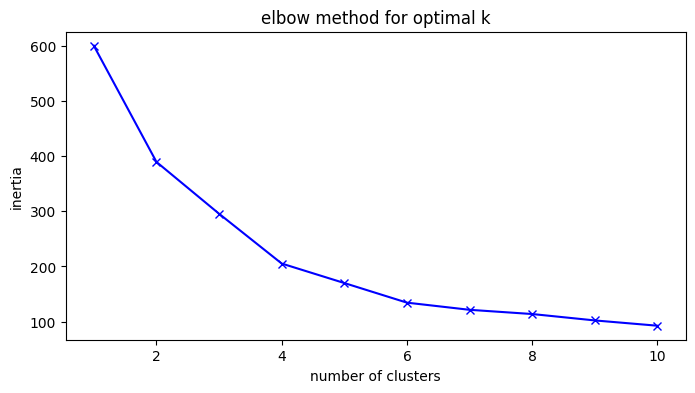

In [23]:
#determine the optimal number of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_features)
  inertia.append(kmeans.inertia_)


#plotting the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, "bx-")
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.title("elbow method for optimal k")
plt.show()

In [24]:
#train kmeans model
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(scaled_features)



In [25]:
#add labels to the original dataset
mall["cluster"] = labels

In [31]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


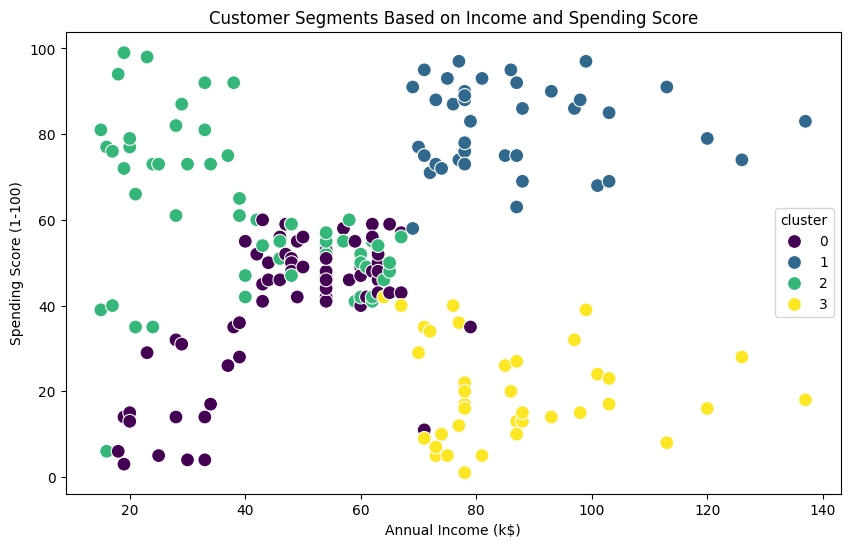

In [29]:
#visualize the clusters
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=mall["Annual Income (k$)"],
    y=mall["Spending Score (1-100)"],
    hue=mall["cluster"],
    palette="viridis",
    s=100
)

plt.title('Customer Segments Based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [30]:
import joblib
joblib.dump(kmeans, "kmeans_model.pkl")

['kmeans_model.pkl']